## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop(columns = ['medv']).copy()
y = boston[['medv']]

In [7]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [9]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.¶1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.¶### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


tree_regressor_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_regressor_8.fit(X_train, y_train)


y_train_pred_8 = tree_regressor_8.predict(X_train)
y_test_pred_8 = tree_regressor_8.predict(X_test)


mse_train_8 = mean_squared_error(y_train, y_train_pred_8)
mse_test_8 = mean_squared_error(y_test, y_test_pred_8)

print(f"Profundidade 8 - MSE treino: {mse_train_8:.2f}, MSE teste: {mse_test_8:.2f}")


Profundidade 8 - MSE treino: 1.95, MSE teste: 8.98


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [19]:
path = tree_regressor_8.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

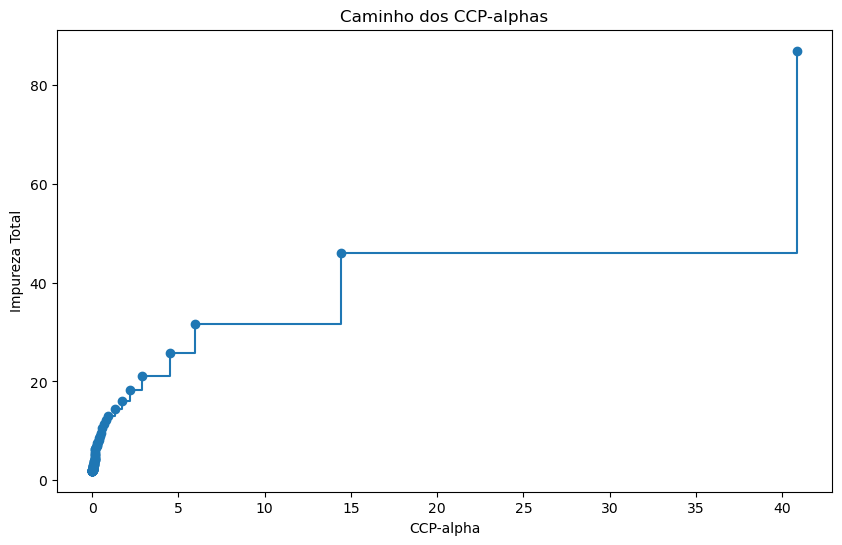

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
plt.xlabel("CCP-alpha")
plt.ylabel("Impureza Total")
plt.title("Caminho dos CCP-alphas")
plt.show()

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [23]:
trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    tree.fit(X_train, y_train)
    trees.append(tree)
print(f"Número de árvores treinadas: {len(trees)}")

Número de árvores treinadas: 90


### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [25]:
mse_train = []
mse_test = []

for tree in trees:
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

for i, ccp_alpha in enumerate(ccp_alphas):
    print(f"CCP-alpha: {ccp_alpha:.5f} - MSE treino: {mse_train[i]:.2f}, MSE teste: {mse_test[i]:.2f}")

CCP-alpha: 0.00000 - MSE treino: 0.00, MSE teste: 10.42
CCP-alpha: 0.00001 - MSE treino: 0.00, MSE teste: 10.41
CCP-alpha: 0.00020 - MSE treino: 0.00, MSE teste: 10.39
CCP-alpha: 0.00031 - MSE treino: 0.01, MSE teste: 10.38
CCP-alpha: 0.00031 - MSE treino: 0.01, MSE teste: 10.35
CCP-alpha: 0.00045 - MSE treino: 0.01, MSE teste: 10.42
CCP-alpha: 0.00089 - MSE treino: 0.03, MSE teste: 10.37
CCP-alpha: 0.00100 - MSE treino: 0.04, MSE teste: 10.37
CCP-alpha: 0.00124 - MSE treino: 0.05, MSE teste: 10.44
CCP-alpha: 0.00124 - MSE treino: 0.05, MSE teste: 10.44
CCP-alpha: 0.00150 - MSE treino: 0.06, MSE teste: 10.45
CCP-alpha: 0.00150 - MSE treino: 0.06, MSE teste: 10.45
CCP-alpha: 0.00178 - MSE treino: 0.07, MSE teste: 10.37
CCP-alpha: 0.00200 - MSE treino: 0.08, MSE teste: 10.42
CCP-alpha: 0.00209 - MSE treino: 0.09, MSE teste: 10.37
CCP-alpha: 0.00223 - MSE treino: 0.10, MSE teste: 10.37
CCP-alpha: 0.00301 - MSE treino: 0.14, MSE teste: 10.44
CCP-alpha: 0.00546 - MSE treino: 0.22, MSE teste

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

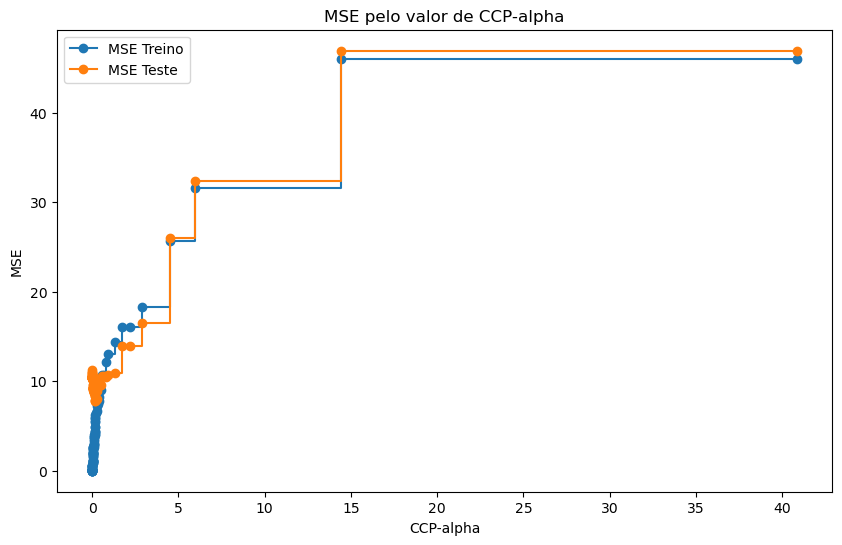

Valor de alpha que minimiza o MSE no conjunto de teste: 0.17329 com MSE = 7.76


In [27]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, mse_train, label="MSE Treino", marker='o', drawstyle="steps-post")
plt.plot(ccp_alphas, mse_test, label="MSE Teste", marker='o', drawstyle="steps-post")
plt.xlabel("CCP-alpha")
plt.ylabel("MSE")
plt.title("MSE pelo valor de CCP-alpha")
plt.legend()
plt.show()
min_mse_alpha = ccp_alphas[mse_test.index(min(mse_test))]
min_mse = min(mse_test)
print(f"Valor de alpha que minimiza o MSE no conjunto de teste: {min_mse_alpha:.5f} com MSE = {min_mse:.2f}")


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [29]:
best_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=min_mse_alpha)
best_tree.fit(X_train, y_train)

r2_train = best_tree.score(X_train, y_train)
r2_test = best_tree.score(X_test, y_test)

print(f"Valor de alpha que minimiza o MSE no conjunto de teste: {min_mse_alpha:.5f}")
print(f"R² treino: {r2_train:.2f}")
print(f"R² teste: {r2_test:.2f}")

Valor de alpha que minimiza o MSE no conjunto de teste: 0.17329
R² treino: 0.93
R² teste: 0.89


### 7. Visualize esta árvore.

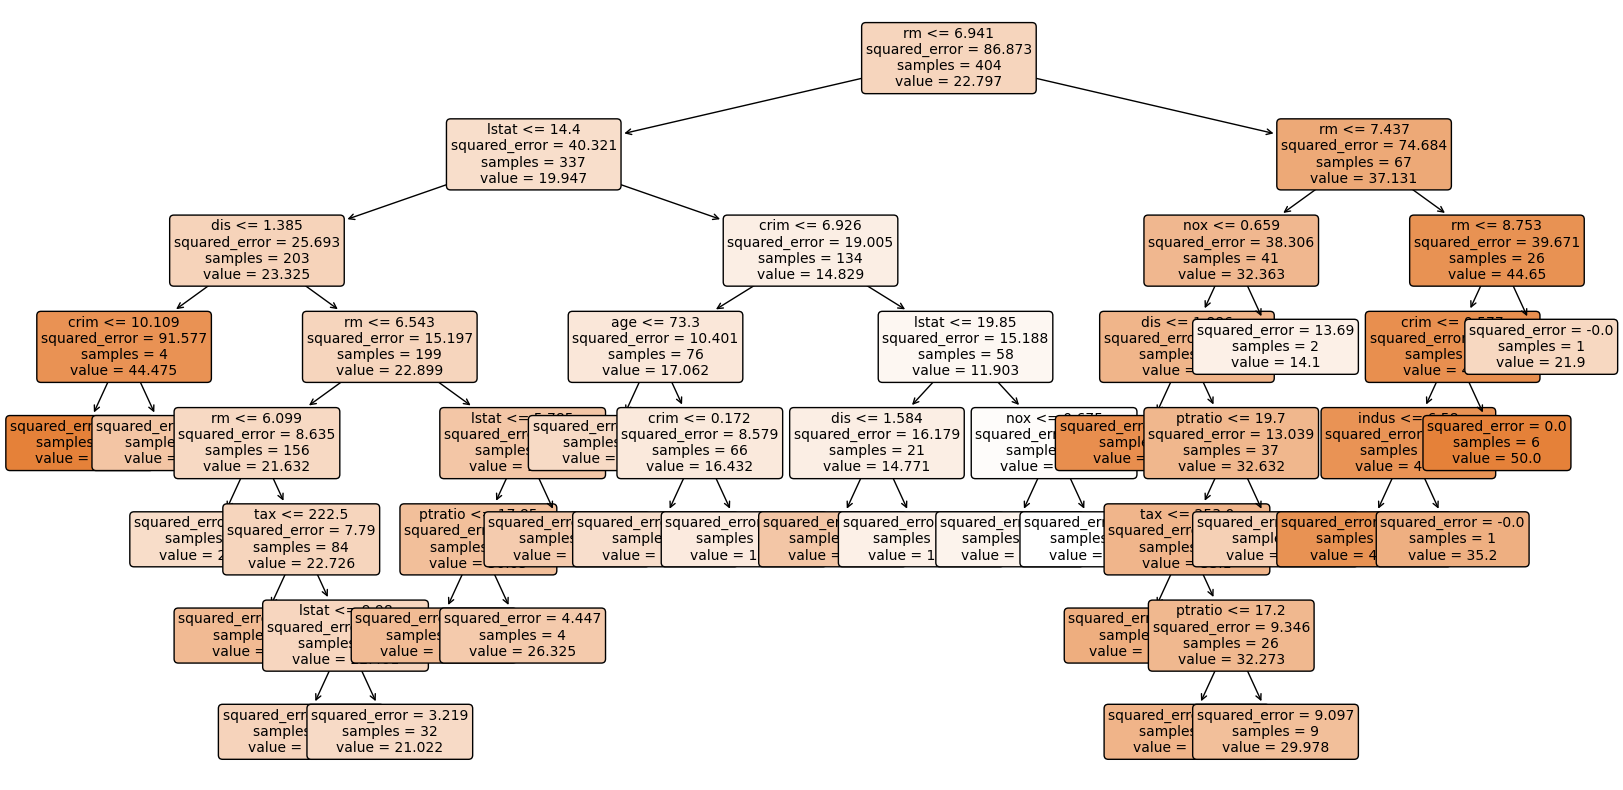

In [31]:
plt.figure(figsize=(20, 10))
plot_tree(best_tree, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.show()